In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
url = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/sales.csv" 
df = pd.read_csv(url)
df = df.drop(df.columns[0], axis=1)
df.head()

,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales
0,625,3,2013-11-06,641,1,1,0,0,7293
1,293,2,2013-07-16,877,1,1,0,1,7060
2,39,4,2014-01-23,561,1,1,0,0,4565
3,676,4,2013-09-26,1584,1,1,0,0,6380
4,709,3,2014-01-22,1477,1,1,0,0,11647


### Metadata Description

- **`store_ID`**: Unique identifier for each shop.
- **`day_of_the_week`**: Encoded from **1 to 7**, representing the day of the week.
- **`date`**: Full date of the data point (day, month, year).
- **`number_of_customers`**: Number of customers that visited the shop on that day.
- **`open`**: Binary variable —  
  `0` = Shop was closed  
  `1` = Shop was open
- **`promotion`**: Binary variable —  
  `0` = No promotions  
  `1` = Promotions were active
- **`state_holiday`**: Encoded as `0`, `'a'`, `'b'`, `'c'` —  
  - `0` = No state holiday  
  - `'a'`, `'b'`, `'c'` = Different types of state holidays
- **`school_holiday`**: Binary variable —  
  `0` = No school holiday  
  `1` = School holiday

**Cleanning Data**

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.head()

,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,625,3,2013-11-06,641,1,1,0,0,7293
1,293,2,2013-07-16,877,1,1,0,1,7060
2,39,4,2014-01-23,561,1,1,0,0,4565
3,676,4,2013-09-26,1584,1,1,0,0,6380
4,709,3,2014-01-22,1477,1,1,0,0,11647


In [7]:
df.isnull().sum()

store_id               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
sales                  0
dtype: int64

In [8]:
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.dayofweek
df['date_2'] = df['date'].dt.day

In [9]:
df.head()

,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,year,month,day,date_2
0,625,3,2013-11-06,641,1,1,0,0,7293,2013,11,2,6
1,293,2,2013-07-16,877,1,1,0,1,7060,2013,7,1,16
2,39,4,2014-01-23,561,1,1,0,0,4565,2014,1,3,23
3,676,4,2013-09-26,1584,1,1,0,0,6380,2013,9,3,26
4,709,3,2014-01-22,1477,1,1,0,0,11647,2014,1,2,22


In [10]:
mapping = {'0': 0, 'a': 1, 'b': 2, 'c': 3}
df['state_holiday'] = df['state_holiday'].map(mapping).astype(int)

In [11]:
df = df.drop(columns=['day', 'date'])

In [12]:
df.head()

,store_id,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,year,month,date_2
0,625,3,641,1,1,0,0,7293,2013,11,6
1,293,2,877,1,1,0,1,7060,2013,7,16
2,39,4,561,1,1,0,0,4565,2014,1,23
3,676,4,1584,1,1,0,0,6380,2013,9,26
4,709,3,1477,1,1,0,0,11647,2014,1,22


In [13]:
df.state_holiday.unique()

array([0, 3, 1, 2])

In [14]:
df[df['open'] == 0]['sales'].sum()

0

In [15]:
df[df['open'] == 0].shape

(108824, 11)

In [16]:
df.shape

(640840, 11)

In [17]:
df = df[df['open'] != 0]

In [18]:
df.shape

(532016, 11)

In [19]:
df = df.drop(columns=['open'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532016 entries, 0 to 640839
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   store_id             532016 non-null  int64
 1   day_of_week          532016 non-null  int64
 2   nb_customers_on_day  532016 non-null  int64
 3   promotion            532016 non-null  int64
 4   state_holiday        532016 non-null  int32
 5   school_holiday       532016 non-null  int64
 6   sales                532016 non-null  int64
 7   year                 532016 non-null  int32
 8   month                532016 non-null  int32
 9   date_2               532016 non-null  int32
dtypes: int32(4), int64(6)
memory usage: 36.5 MB


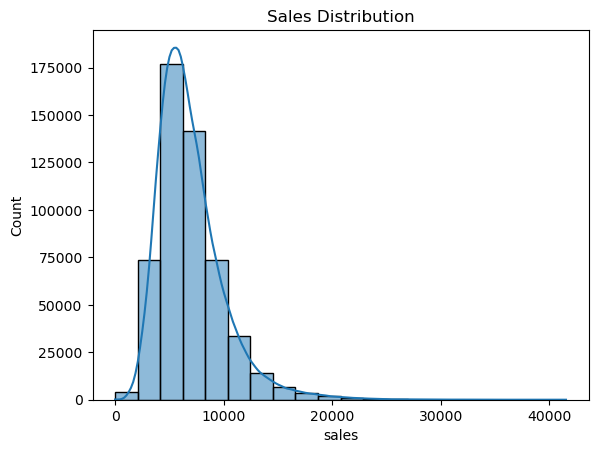

In [21]:
sns.histplot(df['sales'], kde=True, bins=20)
plt.title('Sales Distribution')
plt.show()

In [22]:
#Dropping columns based on correlation matrix

df = df.drop(columns=['store_id'])

In [23]:
df.head()

,day_of_week,nb_customers_on_day,promotion,state_holiday,school_holiday,sales,year,month,date_2
0,3,641,1,0,0,7293,2013,11,6
1,2,877,1,0,1,7060,2013,7,16
2,4,561,1,0,0,4565,2014,1,23
3,4,1584,1,0,0,6380,2013,9,26
4,3,1477,1,0,0,11647,2014,1,22


**Spliting our Data to train and test**

In [25]:
X = df.drop('sales', axis=1)
y = df['sales']

In [26]:
X.head()

,day_of_week,nb_customers_on_day,promotion,state_holiday,school_holiday,year,month,date_2
0,3,641,1,0,0,2013,11,6
1,2,877,1,0,1,2013,7,16
2,4,561,1,0,0,2014,1,23
3,4,1584,1,0,0,2013,9,26
4,3,1477,1,0,0,2014,1,22


In [27]:
y.head()

0     7293
1     7060
2     4565
3     6380
4    11647
Name: sales, dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

**Feature scaling**

In [30]:
scaler = StandardScaler()

In [31]:
scaler.fit(X_train)

StandardScaler()

In [32]:
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [33]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

***Linear regression***

In [35]:
lin_reg = LinearRegression()

In [36]:
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [37]:
pred = lin_reg.predict(X_test_scaled)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", lin_reg.score(X_test_scaled, y_test))

MAE 1153.1121383888214
RMSE 1616.8369928033821
R2 score 0.7306745022374187


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


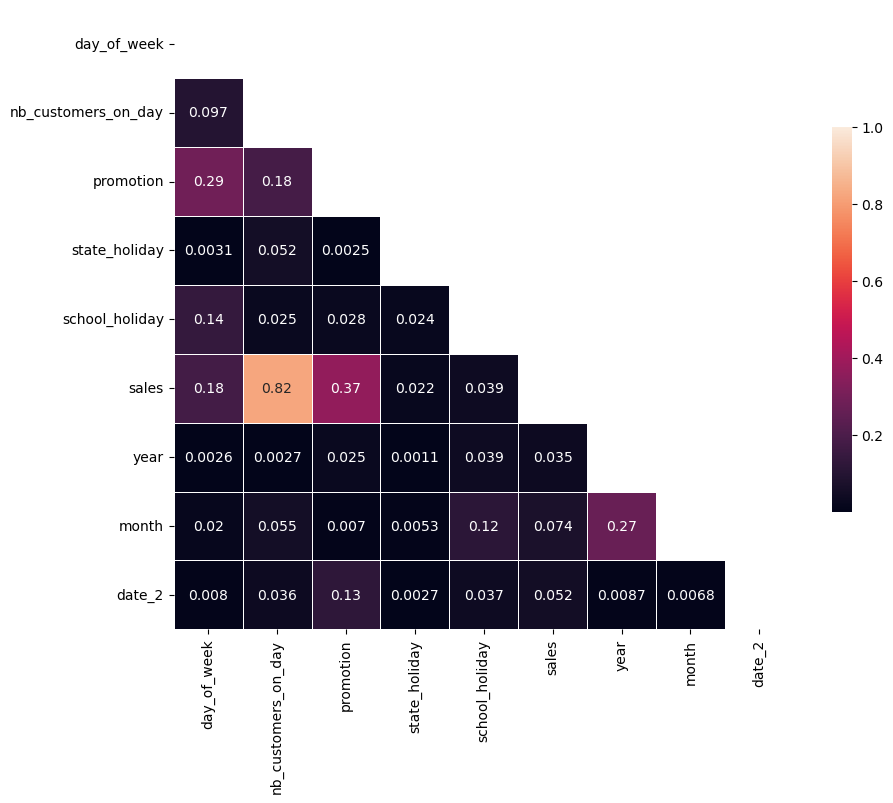

In [38]:
corr=np.abs(df.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

Conclusions correlation matrix: 1) Variables with high correlation between themselves - None 2) Variables with low correlation to Target (sales)

To be dropped least correlated to Target: store_id, state_holiday, school_holiday, year -> R2 score got worse by dropping the columns!

**Decision Tree**

In [41]:
tree = DecisionTreeRegressor(max_depth=10)

In [42]:
tree.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=10)

In [43]:
pred = tree.predict(X_test_scaled)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", tree.score(X_test_scaled, y_test))

MAE 1061.7374106871928
RMSE 1469.25036668336
R2 score 0.7775990631285428


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**KNN regressor**

In [45]:
knn = KNeighborsRegressor(n_neighbors=10)

In [46]:
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=10)

In [47]:
pred = knn.predict(X_test_scaled)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", knn.score(X_test_scaled, y_test))

MAE 1079.5029049659788
RMSE 1492.1271003287513


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R2 score 0.7706194270309132


In [48]:
# The KNN give negative R2 score

**Bagging and Pasting**

In [50]:
bagging_reg = BaggingRegressor(DecisionTreeRegressor(max_depth=10),
                               n_estimators=100,
                               max_samples = 1000)

In [51]:
bagging_reg.fit(X_train_scaled, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=10),
                 max_samples=1000, n_estimators=100)

In [52]:
pred = bagging_reg.predict(X_test_scaled)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", bagging_reg.score(X_test_scaled, y_test))

MAE 1069.8596734996408
RMSE 1485.4474921427995


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R2 score 0.772668505713055


**Random Forest**

In [54]:
forest = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)

In [55]:
forest.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42)

In [56]:
pred = forest.predict(X_test_scaled)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", forest.score(X_test_scaled, y_test))

MAE 1050.59188793056
RMSE 1450.1363036317534


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R2 score 0.7833480276946215


**Adaptive boosting**

In [58]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10),
                            n_estimators=100)

In [59]:
ada_reg.fit(X_train_scaled, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=10),
                  n_estimators=100)

In [60]:
pred = ada_reg.predict(X_test_scaled)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", ada_reg.score(X_test_scaled, y_test))

MAE 1085.2608966058056
RMSE 1481.1342568304387


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R2 score 0.7739867760183471


**Gradient Boosting**

In [62]:
gb_reg = GradientBoostingRegressor(max_depth=10,
                                   n_estimators=100)

In [63]:
gb_reg.fit(X_train_scaled, y_train)

GradientBoostingRegressor(max_depth=10)

In [64]:
pred = gb_reg.predict(X_test_scaled)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", gb_reg.score(X_test_scaled, y_test))

MAE 1037.0285012384725
RMSE 1436.754895587893


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R2 score 0.787327974132648


***Comparing the models' performance***

In [66]:
# Model dictionary
models = {
    'Linear Regression': lin_reg,
    'KNN regressor': knn, 
    'Bagging and Pasting': bagging_reg,
    'Random Forest': forest,
    'AdaBoost': ada_reg,
    'Gradient Boosting': gb_reg
}

# Collect metrics
results = []

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({
        'Model': name,
        'R² Score': round(r2, 3),
        'MSE': round(mse, 3),
        'MAE': round(mae, 3)
    })

# Create and format DataFrame
results_df = pd.DataFrame(results).sort_values(by='R² Score', ascending=False)

# Optional: Use .style for better Jupyter display
results_df.style.set_caption("Model Performance Comparison (Test Set)") \
    .format({'R² Score': '{:.3f}', 'MSE': '{:.3f}', 'MAE': '{:.3f}'}) \
    .set_properties(**{'text-align': 'center'}) \
    .set_table_styles([{
        'selector': 'caption',
        'props': [('color', 'black'),
                  ('font-size', '13px'),
                  ('text-align', 'center'),
                  ('font-weight', 'bold')]
    }])

,Model,R² Score,MSE,MAE
5,Gradient Boosting,0.787,2064264.630,1037.029
3,Random Forest,0.783,2102895.299,1050.592
4,AdaBoost,0.774,2193758.687,1085.261
2,Bagging and Pasting,0.773,2206554.252,1069.860
1,KNN regressor,0.771,2226443.284,1079.503
0,Linear Regression,0.731,2614161.861,1153.112


**Features importance for GB**

In [68]:
importances = gb_reg.feature_importances_

In [69]:
feature_names = X_train.columns  # if using a DataFrame
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

In [70]:
feature_importance_df

,feature,importance
1,nb_customers_on_day,0.881402
2,promotion,0.053604
0,day_of_week,0.022915
6,month,0.017616
7,date_2,0.016858
5,year,0.004872
4,school_holiday,0.002291
3,state_holiday,0.000443


In [71]:
selected_features = ['nb_customers_on_day', 'promotion', 'day_of_week', 'month', 'date_2']

X_train_selected = X_train_scaled[selected_features]
X_test_selected = X_test_scaled[selected_features]

In [72]:
gb_reg.fit(X_train_selected, y_train)

GradientBoostingRegressor(max_depth=10)

In [73]:
pred = gb_reg.predict(X_test_selected)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score_2", gb_reg.score(X_test_selected, y_test))

MAE 1044.3661389695037
RMSE 1445.9148923926389


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R2 score_2 0.7846075587901824


In [74]:
0.7872762100303156 > 0.7845607141179141

# We didn’t achieve a better score using feature selection, as when we used the correlation matrix before.

True

**Hyperparameter Tuning - Grid Search on GB**

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [77]:
param_grid = {
    'n_estimators': [100, 150],   
    'max_depth': [8, 10, 12],      
    'learning_rate': [0.05, 0.1]  
}

In [78]:
grid_search = GridSearchCV(gb_reg, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

! root_mean_squared error
! sns.regplot
! the metrics for the train data -> to check overfitting

In [79]:
grid_search.fit(X_train_selected, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(max_depth=10), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [8, 10, 12],
                         'n_estimators': [100, 150]},
             scoring='neg_mean_squared_error')

In [80]:
best_model = grid_search.best_estimator_

In [81]:
y_pred = best_model.predict(X_test_selected)

print("Best parameters:", grid_search.best_params_)
print("Test MSE:", mean_squared_error(y_test, y_pred))
print("Test R²:", r2_score(y_test, y_pred))

Best parameters: {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 150}
Test MSE: 2068800.985449187
Test R²: 0.7868606135576945


In [82]:
# GB > GRID_SEARCH_GB > GB_SELECTED_Features

0.7872762100303156 > 0.786835518991695 > 0.7845607141179141

True

**Validating the model with the unseen data**

In [260]:
url_2 = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/ironkaggle_notarget.csv" 
df_2 = pd.read_csv(url_2)

df_2.head()

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday
0,7,764,4,2013-12-26,0,0,0,c,1
1,19,22,3,2013-05-22,449,1,0,0,1
2,31,1087,6,2013-06-29,622,1,0,0,0
3,45,139,6,2013-08-17,314,1,0,0,0
4,56,568,1,2014-04-07,356,1,0,0,0


In [262]:
df_2.shape

(71205, 9)

In [264]:
df_filtered = df_2[df_2['Open'] == 0].copy()
df_filtered = df_filtered.True_index.tolist()
array_filtered = np.array(df_filtered)
array_filtered

array([     7,    105,    151, ..., 711682, 711828, 712023])

In [266]:
df_2.iloc[19]

True_index                    146
Store_ID                      241
Day_of_week                     5
Date                   2014-10-17
Nb_customers_on_day           672
Open                            1
Promotion                       0
State_holiday                   0
School_holiday                  1
Name: 19, dtype: object

In [268]:
def clean_dataframe(df):
    df.columns = df.columns.str.lower()
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.dayofweek
    df['date_2'] = df['date'].dt.day
    mapping = {'0': 0, 'a': 1, 'b': 2, 'c': 3}
    df['state_holiday'] = df['state_holiday'].map(mapping).astype(int)
    columns_to_keep = ['true_index','day_of_week',
                     'nb_customers_on_day',
                     'promotion',
                     'state_holiday',
                     'school_holiday',
                     'year',
                     'month',
                     'date_2']
    df = df[[col for col in columns_to_keep if col in df.columns]]
    return df

df_2 = clean_dataframe(df_2)

In [270]:
df_2.columns.tolist()

['true_index',
 'day_of_week',
 'nb_customers_on_day',
 'promotion',
 'state_holiday',
 'school_holiday',
 'year',
 'month',
 'date_2']

In [272]:
X_train_scaled.columns.tolist()

['day_of_week',
 'nb_customers_on_day',
 'promotion',
 'state_holiday',
 'school_holiday',
 'year',
 'month',
 'date_2']

In [274]:
X_train_selected.columns.tolist()

['nb_customers_on_day', 'promotion', 'day_of_week', 'month', 'date_2']

In [276]:
df_2.head()

,true_index,day_of_week,nb_customers_on_day,promotion,state_holiday,school_holiday,year,month,date_2
0,7,4,0,0,3,1,2013,12,26
1,19,3,449,0,0,1,2013,5,22
2,31,6,622,0,0,0,2013,6,29
3,45,6,314,0,0,0,2013,8,17
4,56,1,356,0,0,0,2014,4,7


In [278]:
# scaling df_2

In [280]:
true_index = df_2['true_index']
df_2_features = df_2.drop(columns=['true_index'])  # Drop the true_index column

# Scale the remaining features
df_2_scaled_values = scaler.transform(df_2_features)

# Create a DataFrame with scaled values, preserving original index and columns
df_2_scaled = pd.DataFrame(df_2_scaled_values, columns=df_2_features.columns, index=df_2.index)

# Reassign the true_index column back to the scaled DataFrame
df_2_scaled['true_index'] = true_index

In [282]:
df_2_scaled.head()

,day_of_week,nb_customers_on_day,promotion,state_holiday,school_holiday,year,month,date_2,true_index
0,0.275989,-1.905045,-0.898183,60.745131,2.041464,-1.070042,1.851448,1.169019,7
1,-0.304282,-0.783604,-0.898183,-0.030177,2.041464,-1.070042,-0.255575,0.708246,19
2,1.436531,-0.351512,-0.898183,-0.030177,-0.489844,-1.070042,0.045429,1.514600,31
3,1.436531,-1.120785,-0.898183,-0.030177,-0.489844,-1.070042,0.647435,0.132278,45
4,-1.464824,-1.015885,-0.898183,-0.030177,-0.489844,0.216830,-0.556578,-1.019656,56


In [284]:
X_train_selected.head()

,nb_customers_on_day,promotion,day_of_week,month,date_2
0,-1.015885,-0.898183,-0.304282,-0.857581,-0.443689
1,-0.713670,-0.898183,0.856260,1.851448,-0.328496
2,-0.039307,-0.898183,0.856260,1.550445,1.514600
3,0.192974,-0.898183,0.856260,-0.255575,1.629793
4,-0.806083,-0.898183,-0.304282,-1.158584,1.053826


In [288]:
# Columns used during training (in the correct order)
train_columns = ['nb_customers_on_day', 'promotion', 'day_of_week', 'month', 'date_2']

# Reorder your unseen data to match the training columns
X_pred = df_2_scaled[train_columns]

# Predict sales
pred = best_model.predict(X_pred)

# Assign predictions to 'sales'
df_2_scaled['sales'] = pred

# Reattach 'true_index' (it’s already there, but just to be sure)
df_2_scaled['true_index'] = true_index

In [294]:
df_2_scaled.loc[df_2_scaled['true_index'].isin(array_filtered), 'sales'] = 0

In [296]:
df_2_scaled.head()

,day_of_week,nb_customers_on_day,promotion,state_holiday,school_holiday,year,month,date_2,true_index,sales
0,0.275989,-1.905045,-0.898183,60.745131,2.041464,-1.070042,1.851448,1.169019,7,0.000000
1,-0.304282,-0.783604,-0.898183,-0.030177,2.041464,-1.070042,-0.255575,0.708246,19,4361.906761
2,1.436531,-0.351512,-0.898183,-0.030177,-0.489844,-1.070042,0.045429,1.514600,31,6449.990545
3,1.436531,-1.120785,-0.898183,-0.030177,-0.489844,-1.070042,0.647435,0.132278,45,2827.552144
4,-1.464824,-1.015885,-0.898183,-0.030177,-0.489844,0.216830,-0.556578,-1.019656,56,3674.181027


Additional checking

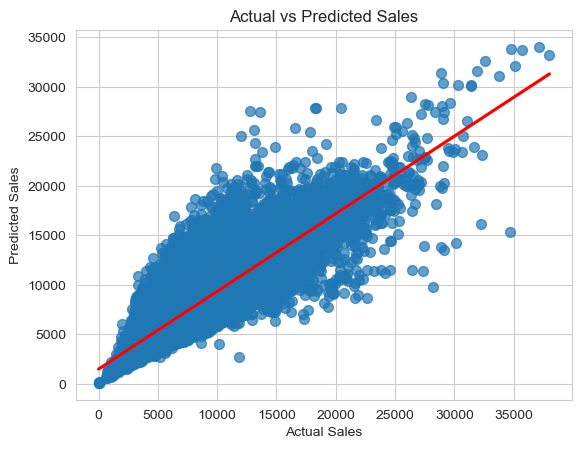

In [314]:
df_plot = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred
})

sns.regplot(
    x='y_test',
    y='y_pred',
    data=df_plot,
    ci=95,
    scatter_kws={'s': 50, 'alpha': 0.7},
    line_kws={'color': 'red'}
)

plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()